План:

0. импорт библиотек

1. Проверить датасет на: дубликаты, пропуски, типы данных, аномальные значения. Произвести предобработку датасета, если это необходимо

2. Поделить всех учеников на волны
Критерии волн:

• 0 волна – присоединились на курс до даты старта курса включительно

• 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно

• 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса

• 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса

• 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса

• 5 волна - присоединились на курс от 4 недель после даты старта курса

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta

In [2]:
df = pd.read_csv('/content/res.csv')

In [3]:
display(len(df))
display(df.info())
display(df.describe())
display(df.head(5))

292685

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292685 entries, 0 to 292684
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  291958 non-null  float64
 1   id_курса                    292685 non-null  int64  
 2   название_курса              292685 non-null  object 
 3   предмет                     292685 non-null  object 
 4   тип предмета                292685 non-null  object 
 5   тип курса                   291958 non-null  object 
 6   дата старта курса           291958 non-null  object 
 7   id_ученика                  291958 non-null  float64
 8   фамилия_ученика             291958 non-null  object 
 9   город_ученика               291958 non-null  object 
 10  статус_отчисления           291231 non-null  float64
 11  дата_открытия_курса         291231 non-null  object 
 12  количество_сданых_работ     291231 non-null  float64
 13  курс_открыт_по

None

,Unnamed: 0,id_курса,id_ученика,статус_отчисления,количество_сданых_работ,курс_открыт_полных_месяцев
count,291958.000000,292685.000000,291958.000000,291231.000000,291231.000000,291231.000000
mean,145978.500000,49.716244,21042.546702,0.774512,195.318987,0.242251
std,84281.159283,32.009635,9087.458383,0.417904,155.110598,0.650632
min,0.000000,0.000000,10001.000000,0.000000,0.000000,0.000000
25%,72989.250000,21.000000,10642.000000,1.000000,75.000000,0.000000
50%,145978.500000,40.000000,25322.000000,1.000000,154.000000,0.000000
75%,218967.750000,75.000000,28647.000000,1.000000,276.000000,0.000000
max,291957.000000,104.000000,33999.000000,1.000000,910.000000,3.000000


,Unnamed: 0,id_курса,название_курса,предмет,тип предмета,тип курса,дата старта курса,id_ученика,фамилия_ученика,город_ученика,статус_отчисления,дата_открытия_курса,количество_сданых_работ,курс_открыт_полных_месяцев
0,0.0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001.0,Markova,Самара,1.0,2024-07-25 18:04:20,119.0,2.0
1,1.0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001.0,Markova,Самара,1.0,2024-07-25 18:04:20,119.0,2.0
2,2.0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001.0,Markova,Самара,1.0,2024-07-25 18:04:20,119.0,2.0
3,3.0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001.0,Markova,Самара,1.0,2024-07-25 18:04:20,119.0,2.0
4,4.0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001.0,Markova,Самара,1.0,2024-07-25 18:04:20,119.0,2.0


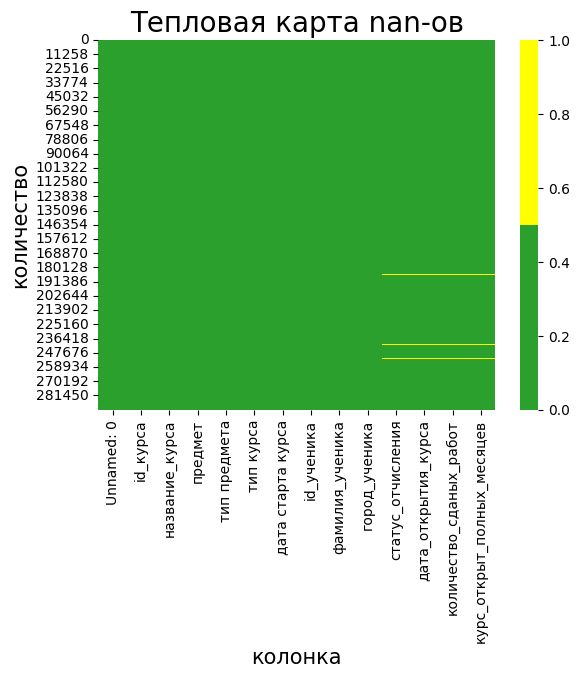

In [4]:
#тепловая карта nan-ов
cols = df.columns[:14] # 14 колонок
# желтый - nan, зеленый - не nan
colours = ['#2ca02c', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Тепловая карта nan-ов', fontsize = 20) # title with fontsize 20
plt.xlabel('колонка', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('количество', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [5]:
#Посчитаем дубликаты всего по строкам и только в столбце id_ученика
display('Количество задвоенных строк : ', df.duplicated().sum())

'Количество задвоенных строк : '

679

In [6]:
#смотрим products
df['название_курса'].value_counts()

,count
название_курса,
Годовой 2к25 стандарт,88856
"Курс ""Кульный"" по итоговому сочинению 2к24",30987
Летняя школа 2к24,29720
"Курс ""Кульный"" по итоговому сочинению 2к24 для своих",19762
НЕдетский курс,14740
...,...
2024-09-25 10:37:18,4
2024-10-13 14:44:48,4
2024-09-25 10:37:26,4


In [7]:
#удаляем 1 колонку
df = df.drop('Unnamed: 0', axis=1)

In [8]:
#меняем написание колонок
df = df.rename(columns={
    "тип предмета": "тип_предмета",
    "тип курса": "тип_курса",
    "дата старта курса": "дата_старта_курса",
    "количество_сданых_работ": "количество_сданных_работ"
    })

In [9]:
# меняем формат на дату
df['дата_старта_курса'] = pd.to_datetime(df['дата_старта_курса'])
df['дата_открытия_курса'] = pd.to_datetime(df['дата_открытия_курса'])

In [10]:
#выделим строки с Nan-ами
nans = df.query('статус_отчисления.isna()| дата_открытия_курса.isna()| количество_сданных_работ.isna()| курс_открыт_полных_месяцев.isna()')

In [11]:
display(nans.head(15))

,id_курса,название_курса,предмет,тип_предмета,тип_курса,дата_старта_курса,id_ученика,фамилия_ученика,город_ученика,статус_отчисления,дата_открытия_курса,количество_сданных_работ,курс_открыт_полных_месяцев
134770,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,25177.0,Кривоносова,Снежное,NaN,NaT,NaN,NaN
134771,1,2024-09-16 13:33:38,102,0,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
134772,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,25177.0,Кривоносова,Снежное,NaN,NaT,NaN,NaN
134773,1,2024-09-16 13:33:38,102,0,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
134774,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,25177.0,Кривоносова,Снежное,NaN,NaT,NaN,NaN
134775,1,2024-09-16 13:33:38,102,0,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
134776,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,25177.0,Кривоносова,Снежное,NaN,NaT,NaN,NaN
134777,1,2024-09-16 13:33:38,102,0,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
134778,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,25177.0,Кривоносова,Снежное,NaN,NaT,NaN,NaN
134779,1,2024-09-16 13:33:38,102,0,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292685 entries, 0 to 292684
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id_курса                    292685 non-null  int64         
 1   название_курса              292685 non-null  object        
 2   предмет                     292685 non-null  object        
 3   тип_предмета                292685 non-null  object        
 4   тип_курса                   291958 non-null  object        
 5   дата_старта_курса           291958 non-null  datetime64[ns]
 6   id_ученика                  291958 non-null  float64       
 7   фамилия_ученика             291958 non-null  object        
 8   город_ученика               291958 non-null  object        
 9   статус_отчисления           291231 non-null  float64       
 10  дата_открытия_курса         291231 non-null  datetime64[ns]
 11  количество_сданных_работ    291231 non-

# промежуточный вывод:
- общий объем датасета составляет 292685 строк
- в данных есть Nan-ы в колонках статус_отчисления, дата_открытия_курса,  количество_сданых_работ и курс_открыт_полных_месяцев
- при этом, Nan-ы могут быть как по основным строкам (фио, тип курса) (их мы 100% удаляем), так и в случае, когда для студента еще не открыт курс (этих мы оставим)
- в колонках с датами поставили правильный формат
- в колонках id_ученика,	статус_отчисления,	количество_сданых_работ и	курс_открыт_полных_месяцев необходимо поставить правильный формат
- удалили 1 колонку, тк она появилась в результате прочтения из индекса
- сделали во всех колонках правильное написание названий
- в среднем отчисляется около 30%, разница между median и mean довольно существенная, возможно, по каким-то предметам отчисляется больше студентов
- количество дубликатов в датасете 679
- у нас есть студент-рекордсмен, сдавший 910 работ
- найдены аномалии в колонке название курса

In [13]:
#обрабатываем Nan-ы
df = df.dropna(subset=['фамилия_ученика'])

In [14]:
#в оставшихся строках с nan-ами заменим nan на ""
df = df.fillna('')

In [15]:
#проверим
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id_курса - 0%
название_курса - 0%
предмет - 0%
тип_предмета - 0%
тип_курса - 0%
дата_старта_курса - 0%
id_ученика - 0%
фамилия_ученика - 0%
город_ученика - 0%
статус_отчисления - 0%
дата_открытия_курса - 0%
количество_сданных_работ - 0%
курс_открыт_полных_месяцев - 0%


In [16]:
#меняем формат на int
df['id_ученика'] = df['id_ученика'].astype('Int64')
df['статус_отчисления'] = pd.to_numeric(df['статус_отчисления'], errors='coerce')
df['статус_отчисления'] = df['статус_отчисления'].astype('Int64')
df['количество_сданных_работ'] = pd.to_numeric(df['количество_сданных_работ'], errors='coerce')
df['количество_сданных_работ'] = df['количество_сданных_работ'].astype('Int64')
df['курс_открыт_полных_месяцев'] = pd.to_numeric(df['курс_открыт_полных_месяцев'], errors='coerce')
df['курс_открыт_полных_месяцев'] = df['курс_открыт_полных_месяцев'].astype('Int64')

In [17]:
# смотрим дубли
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,id_курса,название_курса,предмет,тип_предмета,тип_курса,дата_старта_курса,id_ученика,фамилия_ученика,город_ученика,статус_отчисления,дата_открытия_курса,количество_сданных_работ,курс_открыт_полных_месяцев
1,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2
2,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2
3,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2
4,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2
5,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292680,102,"Курс ""Кульный"" по итоговому сочинению 2к24",Русский,ЕГЭ,Спецкурс,2024-11-04,33999,Катырева,Балашиха,1,2024-11-03 14:45:03,16,0
292681,102,"Курс ""Кульный"" по итоговому сочинению 2к24",Русский,ЕГЭ,Спецкурс,2024-11-04,33999,Катырева,Балашиха,1,2024-11-03 14:45:03,16,0
292682,102,"Курс ""Кульный"" по итоговому сочинению 2к24",Русский,ЕГЭ,Спецкурс,2024-11-04,33999,Катырева,Балашиха,1,2024-11-03 14:45:03,16,0
292683,102,"Курс ""Кульный"" по итоговому сочинению 2к24",Русский,ЕГЭ,Спецкурс,2024-11-04,33999,Катырева,Балашиха,1,2024-11-03 14:45:03,16,0


строки полностью идентичны, оставим по одному уникальному значению

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
display('Количество задвоенных строк после очистки: ', df.duplicated().sum())

'Количество задвоенных строк после очистки: '

0

In [20]:
# смотрим аномальные названия курса
df['название_курса'] = df['название_курса'].str.replace(r'\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}', '', regex=True)

In [21]:
names = df['название_курса'].unique().tolist()
display(f'Уникальные названия курса: {names}')

'Уникальные названия курса: [\'Годовой 2к25 стандарт\', \'В погоне за пятеркой 2К25 стандарт\', \'Летняя школа 2к24\', \'НЕдетский курс\', \'Курс "Кульный" по итоговому сочинению 2к24 для своих\', \'Крепкий орешек\', \'Химическое равновесие\', \'КОНСПЕКТЫ ПО ЗООЛОГИИ\', \'Курс "Кульный" по итоговому сочинению 2к24\', \'ВСЕМИРКА\', \'СПЕЦКУРС ПО КАРТАМ\', \'Годовой 2К25 стандарт с Машей\', \'Скорая помощь по русскому 2к24\', \'Скорая помощь по математике 2к24\', \'Мини-курс по скорочтению\', \'Бездна сюжетов\', \'Курс "Кульный" по итоговому сочинению 2к24 с проверкой\', \'Годовой курс 2к25\', \'Годовой курс 2к25 комбо (русский + обществознание + математика)\', \'Разбор структуры ОГЭ по био\', \'Морфология PRO\', \'Скорая помощь по английскому 2к24\', \'Погоня за мечтой 2к25\', \'Годовой 2К25 стандарт с Катей\', \'Вычисляй как Бог\', \'Скорая помощь по обществознанию 2к24\', \'Скорая помощь по истории 2к24\', \'Годовой 2к25 минимал\', \'Скорая помощь по биологии 2к24\', \'Скорая помощь п

убрали странные названия курсов

In [22]:
#заодно выведем уникальные фамилии
names = df['фамилия_ученика'].unique().tolist()
display(f'Уникальные фамилии: {names}')

"Уникальные фамилии: ['Markova', 'Коваленко', 'Гусев', 'Пушкина', 'Чернобель', 'Мирзоян', 'Ищенко', 'Вахрушева', 'Павлова', 'Парфёнова', 'Дикова', 'Кутылина', 'Бархатова', 'Ролдугина', 'Накагава', 'Имамутдинова', 'Томахова', 'Денисова', 'Тайгозина', 'Боровинская', 'Ерохина', 'Миннебаева', 'Уразова', 'Кукушкина', 'Полунина', 'Киреева', 'Шишман', 'Степанова', 'Москаева', 'Третьякова', 'Глухова', 'Горбунова', 'Александрова', 'Баринова', 'Сулейманова', 'Боженова', 'Рогова', 'Аглиева', 'Кирсанова', 'Данил', 'Рожкова', 'Искандарова', 'Kesian', 'Абдувелиева', 'Моторова', 'Яновская', 'Толк', 'Бакирова', 'Ваулина', 'Виноделов', 'Солдатова', 'Эрнестова', 'Солнышко', 'Милкова', 'Николаенко', 'Назарова', 'Sheina', 'Калужская', 'Каримова', 'Лепешкина', 'Корепова', 'Гоменюк', 'Бедина', 'Шастун', 'Сиротина', 'Abdulaeva', 'Фролкова', 'Кокова', 'Вшивцева', 'Alexandrova', 'Бибилова', 'Гаврикова', 'Якунина', 'Давыдов', 'Макарова', 'Исаева', 'Матяш', 'Капустина', 'Кулешова', 'Gold', 'Одинцова', 'Лескова',

Промежуточный вывод:
- есть вариант, где не указана фамилия/вместо нее указано имя/прикол какой-то 'Нет', 'G', 'Серж', 'Мяу', 'Bro', 'На','Емпти', 'Family', 'Пон', 'Лера', 'См', 'Дл'
- фамилии указаны и по-русски и по-английски, поэтому тут на дубли никак не посмотришь
- единственное, что ясно, так это то, что это поле заполняется участниками свободно

In [23]:
#смотрим аномалии для дат/количества сданных работ
#создаем график для динамики количества сданных работ
df_filtered = df.query('количество_сданных_работ!=""')
fig1 = px.line(df_filtered , x=df_filtered.index, y='количество_сданных_работ', title='Динамика количества сданных работ')
fig1.update_layout(xaxis_title='id ученика',
                  yaxis_title='Количество сданных работ')
fig1.show()

<ipython-input-23-c32bba156bd9>:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_filtered = df.query('количество_сданных_работ!=""')


In [24]:
#добавим ящик с усами
fig = px.box(df_filtered, y='количество_сданных_работ', title='Количество сданных работ')
fig.show()

In [25]:
#и еще один
fig = px.scatter(df_filtered, x='количество_сданных_работ', y='курс_открыт_полных_месяцев', title='Количество сданных работ в разбивке по месяцам')
fig.update_layout(xaxis_title='Количество сданных работ',
                  yaxis_title='Длительность использования сервиса (количество месяцев)')
fig.show()

итак, у нас есть аномальные значения по количеству сданных работ от 364 до 910, и, если за 2 месяца человек еще мог столько нарешать, то менее чем за 1 месяц - это нереально, по крайней мере, на первый взгляд

Посмотрим тип курса, возможно они бывают разные по длительности и по сложности. Тогда ученик может проходить сразу несколько, и такое количество работ будет объяснимо

In [26]:
df['тип_курса'].value_counts()

,count
тип_курса,
Спецкурс,8373
Годовой,5109
Годовой 2.0,118


итак, у нас есть 3 вида курсов,надо понять есть ли пересечения по id учеников, помня о том, что мы заменили nan на нет_информации, последнюю надо отфильтровать

In [27]:
df.columns

Index(['id_курса', 'название_курса', 'предмет', 'тип_предмета', 'тип_курса',
       'дата_старта_курса', 'id_ученика', 'фамилия_ученика', 'город_ученика',
       'статус_отчисления', 'дата_открытия_курса', 'количество_сданных_работ',
       'курс_открыт_полных_месяцев'],
      dtype='object')

In [28]:
zero_mnth = df_filtered.query('(количество_сданных_работ > 300)')
display(len(zero_mnth))

# сгруппируем
objects = zero_mnth.groupby(['фамилия_ученика','предмет','тип_курса'])['id_ученика'].count().reset_index()
objects.columns = ['фамилия_ученика','предмет','тип_курса', 'count']
objects = objects.sort_values(['фамилия_ученика'],ascending=False).head(20)
display(objects)

<ipython-input-28-5c70dbefe480>:1: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.



1254

,фамилия_ученика,предмет,тип_курса,count
959,Яценко,Химия,Спецкурс,1
953,Яценко,Математика,Спецкурс,1
948,Яценко,Английский язык,Годовой,1
949,Яценко,Английский язык,Спецкурс,1
950,Яценко,Биология,Спецкурс,1
952,Яценко,Литература,Спецкурс,1
951,Яценко,История,Спецкурс,1
954,Яценко,Обществознание,Годовой,1
955,Яценко,Обществознание,Спецкурс,1
956,Яценко,Русский,Годовой,1


In [29]:
objects = zero_mnth.groupby(['фамилия_ученика'])['тип_курса'].count().reset_index()
objects.columns = ['фамилия_ученика','тип_курса']
objects = objects.sort_values(['тип_курса'],ascending=False).head(20)
display(objects)

,фамилия_ученика,тип_курса
62,Максимова,36
81,Петрова,26
52,Кузнецова,17
118,Шарапова,16
50,Косенкова,14
9,Австрина,14
73,Наум,14
125,Яценко,13
28,Герцева,13
37,Зейналова,13


Полозрения подтвердились, один ученик может одновременно делать несколько курсов, поэтому у него может быть много домашки

In [30]:
#добавим ящик с усами
fig = px.box(zero_mnth, y='количество_сданных_работ', title='Количество сданных работ')
fig.show()

In [31]:
#отфильтруем данные по порогу в 75%
df_new = df.query('количество_сданных_работ<=630')

<ipython-input-31-0738086a95c4>:2: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.



In [32]:
result = (len(df_new)/len(df)) * 100
print(f'после удаления аномалий и nan-ов осталось {result}% исходных данных')

после удаления аномалий и nan-ов осталось 98.91911764705881% исходных данных


# промежуточный вывод:
- убрали дубли
- заменили nan-ы на пропуск, убрали нерелевантные строки с Nan-ами, после очистки потеряли менее 2 % исходных данных, это допустимый процент
- проанализировали аномалии, убрали совсем нереальные варианты
- убрали лишние названия курсов
- судя по тому, что до 2 и 3 месяца доходят не все, активный спрос на услуги сервиса происходит за месяц-два до ЕГЭ
- поле фамилия ученика заполняется свободно, поэтому не имеет смысла ее обрабатывать
- у учеников может быть сразу несколько программ и курсов, поэтому неудивительно, что у них столько домашки

In [33]:
#делим учеников на волны
df_new['волна'] = pd.cut((df_new['дата_открытия_курса'] - df_new['дата_старта_курса']).dt.days,
                     bins=[-float("inf"), 0, 7, 14, 21, 28, float("inf")],
                     labels=[0, 1, 2, 3, 4, 5])

<ipython-input-33-596041e7ab68>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
display(df_new.head())

,id_курса,название_курса,предмет,тип_предмета,тип_курса,дата_старта_курса,id_ученика,фамилия_ученика,город_ученика,статус_отчисления,дата_открытия_курса,количество_сданных_работ,курс_открыт_полных_месяцев,волна
0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2,0
22,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10001,Markova,Самара,1,2024-07-25 18:04:20,119,2,0
44,24,В погоне за пятеркой 2К25 стандарт,Математика (база),ЕГЭ,Годовой,2024-09-17,10001,Markova,Самара,1,2024-09-01 07:49:22,119,1,0
66,29,Летняя школа 2к24,Русский,ЕГЭ,Спецкурс,2024-06-21,10001,Markova,Самара,0,2024-07-25 18:04:19,119,0,5
88,33,Летняя школа 2к24,Математика,ЕГЭ,Спецкурс,2024-06-18,10001,Markova,Самара,0,2024-07-25 18:04:20,119,0,5


In [35]:
#смотрим распределение учеников по волнам
fig = px.histogram(df_new, x="волна",
                   title='Распределение учеников по волнам')
fig.update_layout(xaxis_title='Волна',
                  yaxis_title='Количество учеников')
fig.show()

- больше всего учеников в 1 волне(6627 человек)
- количество учеников во 2-4 волнах почти одинаково

Вывод:
в рамках работы с датасетом был(а/и):
- произведен импорт библиотек
- проверен датасет на: дубликаты, пропуски, типы данных, аномальные значения. - произведена предобработка датасета:
 1. обработаны Nan-ы, обозначены причины их появлния
 2. отфильтрованы аномалии
 3. удалены дубликаты

 Также, было обнаружено, что в среднем отчисляется около 30%, разница между median и mean довольно существенная, возможно, по каким-то предметам отчисляется больше студентов.

 Помимо этого, было установлено, что поле фио_ученика заполняется от балды, тк правила заполнения поля не установлены

На последнем этапе ученики были поделены на волны в зависимости от времени присоединения к курсу:
• 0 волна – присоединились на курс до даты старта курса включительно
• 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно
• 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса
• 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса
• 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса
• 5 волна - присоединились на курс от 4 недель после даты старта курса

Было отмечено, что:
- больше всего учеников в 1 волне(6627 человек)
- количество учеников во 2-4 волнах почти одинаково

In [36]:
from google.colab import files
df_new.to_csv('df_new.csv')
files.download('df_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ссылка на дашборд: https://datalens.yandex.cloud/datasets/4k33cuhlz9jir-novyy-dataset
